[*********************100%***********************]  1 of 1 downloaded
<type 'str'>
Index([u'open', u'high', u'close', u'low', u'volume', u'price_change',
       u'p_change', u'ma5', u'ma10', u'ma20', u'v_ma5', u'v_ma10', u'v_ma20'],
      dtype='object')
Index([u'2019-04-24', u'2019-04-23', u'2019-04-22', u'2019-04-19',
       u'2019-04-18', u'2019-04-17', u'2019-04-16', u'2019-04-15',
       u'2019-04-12', u'2019-04-11',
       ...
       u'2017-01-16', u'2017-01-13', u'2017-01-12', u'2017-01-11',
       u'2017-01-10', u'2017-01-09', u'2017-01-06', u'2017-01-05',
       u'2017-01-04', u'2017-01-03'],
      dtype='object', name=u'date', length=562)
              open         high        close          low        volume  \
count   562.000000   562.000000   562.000000   562.000000  5.620000e+02   
mean   3065.682740  3084.723256  3069.120819  3048.180160  1.842587e+06   
std     276.788248   274.474512   277.268523   278.971132  7.849916e+05   
min    2446.020000  2488.480000  2464.36000

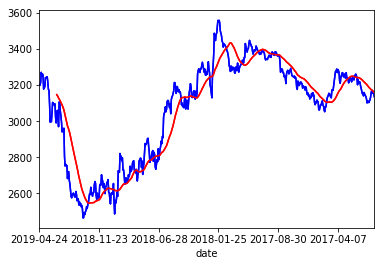

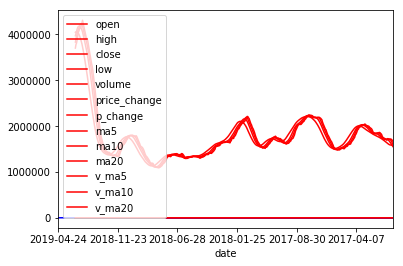

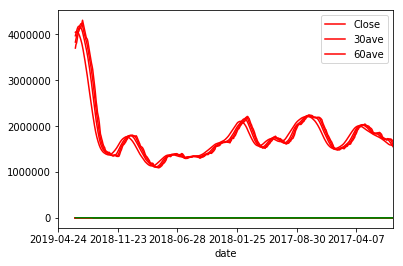

      code   name c_name
0   600007   中国国贸   外资背景
1   600114   东睦股份   外资背景
2   600132   重庆啤酒   外资背景
3   600182    S佳通   外资背景
4   600595   中孚实业   外资背景
5   600641   万业企业   外资背景
6   600779    水井坊   外资背景
7   600801   华新水泥   外资背景
8   600819   耀皮玻璃   外资背景
9   000001   平安银行   外资背景
10  000005   世纪星源   外资背景
11  000541   佛山照明   外资背景
12  000608   阳光股份   外资背景
13  000659  *ST中富   外资背景
14  000869   张 裕Ａ   外资背景
15  000895   双汇发展   外资背景
16  000932  *ST华菱   外资背景
17  000935   四川双马   外资背景
18  002032  苏 泊 尔   外资背景
19  002047   宝鹰股份   外资背景


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import datetime
import tushare as ts
import fix_yahoo_finance as yf
import os

os.mkdir('.\\out')
yf.pdr_override()
start=datetime.datetime(2006, 10, 1)
end=datetime.datetime(2012, 1, 1)
data = web.get_data_yahoo('AAPL',start,end)
data.to_csv('.\\out\\AAPL.csv')

df_stockload = web.DataReader("000001.SS", "yahoo", datetime.datetime(2017,1,1), datetime.date.today())
print(type(datetime.datetime.now().strftime('%Y-%m-%d')))
df_stockload = ts.get_hist_data('sh',start='2017-01-01',end=datetime.datetime.now().strftime('%Y-%m-%d'))
df_stockload.to_csv('.\\out\\yahoo.csv')
print (df_stockload.columns)#查看列名
print (df_stockload.index)#查看索引
print (df_stockload.describe())#查看各列数据描述性统计

#绘制移动平均线
df_stockload.close.plot(c='b')
df_stockload.close.rolling(window=30).mean().plot(c='r') 
df_stockload.rolling(window=30).mean().plot(c='r')
df_stockload.close.rolling(window=60).mean().plot(c='g') 
df_stockload.close.rolling(window=30).mean().plot(c='g')
plt.legend(['Close','30ave','60ave'],loc='best')
plt.show()

df_concept = ts.get_concept_classified()#概念分类
print (df_concept.head(20))